In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #array

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
np.shape(train_images[0]) #ada 3 nilai yang terdiri dari : dimensi baris,kolom,nilai rgb https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

(32, 32, 3)

In [ ]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
len(train_images[0][0])

32

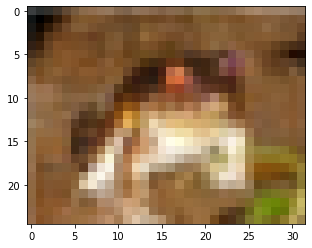

In [ ]:
plt.imshow(train_images[0][:][:25])

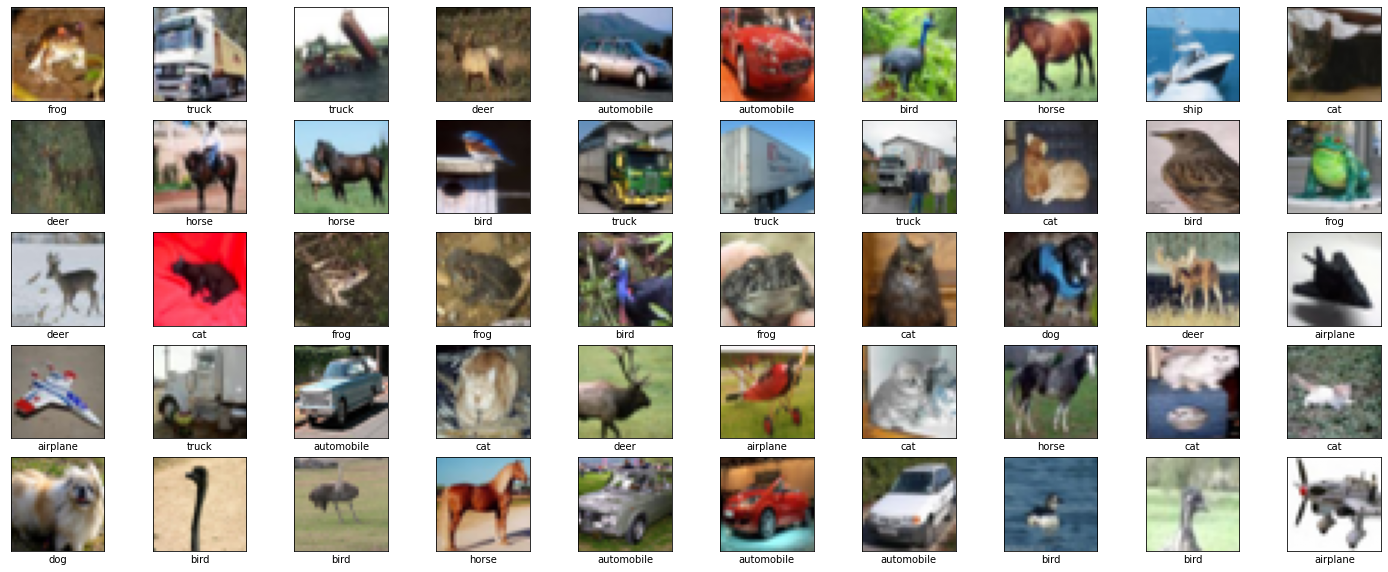

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(25,10)) #kotak putih
for i in range(50):
    plt.subplot(5,10,i+1) #kotak subplot 5 x 5
    plt.xticks([]) #ngilangin sumbu x
    plt.yticks([]) #ngilangin sumbu y
    plt.grid(False) #ga pake grid
    plt.imshow(train_images[i]) #menampilkan gambar i, dikeep sampe plt.show di run
    plt.xlabel(class_names[train_labels[i][0]]) #tambah label yang diambil dari list class_names per index
plt.show()

In [ ]:
model = models.Sequential() #manggil kelas Sequential dari library models dan inisiasi model cnn
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #menambahkan layer sesuai dimensi gambar input yaitu 32,32,3 atau pake None jika dimeensi gambar tidak seragam; prosesnya disebut spatial convolution
#jika tambah batch size, maka batch size taruh didepan lalu baru dimensi gambarnya, tapi disesuaikan lagi dimensinya
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 1.5468 - accuracy: 0.4369 - val_loss: 1.3481 - val_accuracy: 0.5099
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1822 - accuracy: 0.5812 - val_loss: 1.0869 - val_accuracy: 0.6160
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0231 - accuracy: 0.6400 - val_loss: 1.0279 - val_accuracy: 0.6405
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9217 - accuracy: 0.6764 - val_loss: 0.9768 - val_accuracy: 0.6585
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8522 - accuracy: 0.7022 - val_loss: 0.9288 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7943 - accuracy: 0.7217 - val_loss: 0.9340 - val_accuracy: 0.6802
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7463 - accuracy: 0.7399 - val_loss: 0.8612 -

313/313 - 4s - loss: 0.8486 - accuracy: 0.7139 - 4s/epoch - 14ms/step


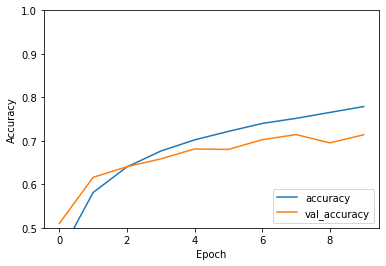

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7139000296592712
